In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr
from dotenv import load_dotenv
import rasterio
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns
import googlemaps

load_dotenv()

True

We are removing "Pusa, Delhi - IMD" station because CPCB does not show its location on the map and when retrived its location from OpenAQ, it does not show up on Google Maps upon manual verification.
> 'Pusa, Delhi - IMD': {'lat': 28.639645, 'lon': 77.146263}

This locations are manually verified from CPCB visual map.

In [3]:
station_locs = {'Alipur, Delhi - DPCC': {'lat': 28.815329, 'lon': 77.15301},
                "Arya Nagar, Bahadurgarh - HSPCB": {"lat":28.6701 , "lon": 76.9254},
 'Anand Vihar, Delhi - DPCC': {'lat': 28.647622, 'lon': 77.315809},
 'Ashok Vihar, Delhi - DPCC': {'lat': 28.695381, 'lon': 77.181665},
 'Aya Nagar, Delhi - IMD': {'lat': 28.4706914, 'lon': 77.1099364},
 'Bawana, Delhi - DPCC': {'lat': 28.7762, 'lon': 77.051074},
 'Burari Crossing, Delhi - IMD': {'lat': 28.7256504, 'lon': 77.2011573},
 'CRRI Mathura Road, Delhi - IMD': {'lat': 28.5512005, 'lon': 77.2735737},
 'Chandni Chowk, Delhi - IITM': {'lat': 28.656756, 'lon': 77.227234},
 'DTU, Delhi - CPCB': {'lat': 28.7500499, 'lon': 77.1112615},
 'Dr. Karni Singh Shooting Range, Delhi - DPCC': {'lat': 28.498571,
  'lon': 77.26484},
 'Dwarka-Sector 8, Delhi - DPCC ': {'lat': 28.5710274, 'lon': 77.0719006},
 'East Arjun Nagar, Delhi - CPCB': {'lat': 28.655935, 'lon': 77.294904},
 'IGI Airport (T3), Delhi - IMD': {'lat': 28.5627763, 'lon': 77.1180053},
 'IHBAS, Dilshad Garden, Delhi - CPCB': {'lat': 28.6811736, 'lon': 77.3025234},
 'ITO, Delhi - CPCB': {'lat': 28.628624, 'lon': 77.24106},
 'Jahangirpuri, Delhi - DPCC': {'lat': 28.73282, 'lon': 77.170633},
 'Jawaharlal Nehru Stadium, Delhi - DPCC': {'lat': 28.58028, 'lon': 77.233829},
 'Lodhi Road, Delhi - IITM': {'lat': 28.588333, 'lon': 77.221667},
 'Lodhi Road, Delhi - IMD': {'lat': 28.5918245, 'lon': 77.2273074},
 'Major Dhyan Chand National Stadium, Delhi - DPCC': {'lat': 28.611281,
  'lon': 77.237738},
 'Mandir Marg, Delhi - DPCC': {'lat': 28.636429, 'lon': 77.201067},
 'Mundka, Delhi - DPCC': {'lat': 28.684678, 'lon': 77.076574},
 'NSIT Dwarka, Delhi - CPCB': {'lat': 28.60909, 'lon': 77.0325413},
 'Najafgarh, Delhi - DPCC': {'lat': 28.570173, 'lon': 76.933762},
 'Narela, Delhi - DPCC': {'lat': 28.822836, 'lon': 77.101981},
 'Nehru Nagar, Delhi - DPCC': {'lat': 28.56789, 'lon': 77.250515},
 'North Campus, DU, Delhi - IMD': {'lat': 28.6573814, 'lon': 77.1585447},
 'Okhla Phase-2, Delhi - DPCC': {'lat': 28.530785, 'lon': 77.271255},
 'Pusa, Delhi - DPCC': {'lat': 28.639645, 'lon': 77.146262},
 'Patparganj, Delhi - DPCC': {'lat': 28.623763, 'lon': 77.287209},
 'Punjabi Bagh, Delhi - DPCC': {'lat': 28.674045, 'lon': 77.131023},
 'R K Puram, Delhi - DPCC': {'lat': 28.563262, 'lon': 77.186937},
 'Rohini, Delhi - DPCC': {'lat': 28.732528, 'lon': 77.11992},
 'NISE Gwal Pahari, Gurugram - IMD': {'lat': 28.422681, 'lon': 77.148944},
 'Sector-51, Gurugram - HSPCB': {'lat': 28.4227, 'lon': 77.0667},
 'Shadipur, Delhi - CPCB': {'lat': 28.6514781, 'lon': 77.1473105},
 'Sirifort, Delhi - CPCB': {'lat': 28.5504249, 'lon': 77.2159377},
 'Sonia Vihar, Delhi - DPCC': {'lat': 28.710508, 'lon': 77.249485},
 'Sri Aurobindo Marg, Delhi - DPCC': {'lat': 28.531346, 'lon': 77.190156},
 'Teri Gram, Gurugram - HSPCB': {'lat': 28.4275 , 'lon': 77.1465},
 'Vikas Sadan, Gurugram - HSPCB': {'lat': 28.4501238 , 'lon': 77.0263051},
 'Vivek Vihar, Delhi - DPCC': {'lat': 28.672342, 'lon': 77.31526},
 'Wazirpur, Delhi - DPCC': {'lat': 28.699793, 'lon': 77.165453},
 'Sector 30, Faridabad - HSPCB': {'lat': 28.4417, 'lon': 77.3217},
 'Sector- 16A, Faridabad - HSPCB': {'lat': 28.4088421, 'lon': 77.3099081},
'New Industrial Town, Faridabad - HSPCB': {'lat': 28.39072, 'lon': 77.30059},
'Sector 11, Faridabad - HSPCB': {'lat': 28.376058, 'lon': 77.315741},
'Nathu Colony, Ballabgarh - HSPCB': {'lat': 28.3419248, 'lon': 77.319699},
'Sector-116, Noida - UPPCB': {'lat': 28.569230, 'lon': 77.393848},
'Sector - 62, Noida - IMD': {'lat': 28.6245479, 'lon': 77.3577104},
'Sector-1, Noida - UPPCB': {'lat': 28.5898, 'lon': 77.3101},
'Sector - 125, Noida - UPPCB': {'lat': 28.5447608, 'lon': 77.3231257},
'Knowledge Park - V, Greater Noida - UPPCB': {'lat': 28.557054, 'lon': 77.453663},
'Knowledge Park - III, Greater Noida - UPPCB': {'lat': 28.47272, 'lon': 77.482000},
'Sector-2 IMT, Manesar - HSPCB': {'lat': 28.360699, 'lon': 76.936090},
'Sanjay Nagar, Ghaziabad - UPPCB': {'lat': 28.685382, 'lon': 77.453839},
'Vasundhara, Ghaziabad - UPPCB': {'lat': 28.6603346, 'lon': 77.3572563},
'Indirapuram, Ghaziabad - UPPCB': {'lat': 28.646233, 'lon': 77.358075},
'Loni, Ghaziabad - UPPCB': {'lat': 28.757294, 'lon': 77.278792},
'Murthal, Sonipat - HSPCB': {'lat': 29.027200, 'lon': 77.062100},
'New Collectorate, Baghpat - UPPCB': {'lat': 28.974801, 'lon': 77.213357},
'Sardar Patel Inter College, Baghpat - UPPCB': {'lat': 28.964949, 'lon': 77.278761},
'Municipal Corporation Office, Dharuhera - HSPCB': {'lat': 28.206800, 'lon': 76.799700},
'RIICO Ind. Area III, Bhiwadi - RSPCB': {'lat': 28.194909, 'lon': 76.862296},
'Shyam Nagar, Palwal - HSPCB': {'lat': 28.1485564, 'lon': 77.3320667}
}

len(station_locs)

66

In [4]:
# s = "Latitude: 28.1485564 , Longitude: 77.3320667"
# print(s.replace("Latitude: ", "{'lat': ").replace(" , Longitude: ", ", 'lon': ")+ "}")

In [5]:
station_df = pd.DataFrame(station_locs).T
station_df.index.name = 'station'
assert len(station_df) == len(station_df['lat'].unique())
assert len(station_df) == len(station_df['lon'].unique())
station_df.head(2)

,lat,lon
station,,
"Alipur, Delhi - DPCC",28.815329,77.15301
"Arya Nagar, Bahadurgarh - HSPCB",28.670100,76.92540


## Add elevation data

In [6]:
gmaps = googlemaps.Client(key=os.getenv('ZEEL_IITGN_GMS'))
elevations = gmaps.elevation([tuple(x) for x in station_df[['lat', 'lon']].values])
elevations[0]

{'elevation': 232.7238922119141,
 'location': {'lat': 28.81533, 'lng': 77.15301},
 'resolution': 152.7032318115234}

In [7]:
station_df['elevation'] = [x['elevation'] for x in elevations]
station_df.head(2)

,lat,lon,elevation
station,,,
"Alipur, Delhi - DPCC",28.815329,77.15301,232.723892
"Arya Nagar, Bahadurgarh - HSPCB",28.670100,76.92540,235.903046


In [8]:
station_df.elevation.max(), station_df.elevation.min()

(296.3569030761719, 214.1299743652344)

In [10]:
# gmaps.speed_limits((28.815329, 77.15301))

## Add population data

In [11]:
pop_data = rasterio.open("landscan-global-2022.tif")
# convert this to a xarray dataset
pop_np = pop_data.read(1)
pop_np.shape

(21600, 43200)

In [12]:
lats = pop_data.xy(np.arange(pop_np.shape[0]), 0)[1]
lons = pop_data.xy(0, np.arange(pop_np.shape[1]))[0]
pop_ds = xr.Dataset({'population': (['lat', 'lon'], pop_np)},
                    coords={'lat': lats, 'lon': lons})
pop_ds['population'] = pop_ds['population'].where(pop_ds['population'] >= 0)
pop_ds

<xarray.Dataset>
Dimensions:     (lat: 21600, lon: 43200)
Coordinates:
  * lat         (lat) float64 90.0 89.99 89.98 89.97 ... -89.98 -89.99 -90.0
  * lon         (lon) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Data variables:
    population  (lat, lon) float64 nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0

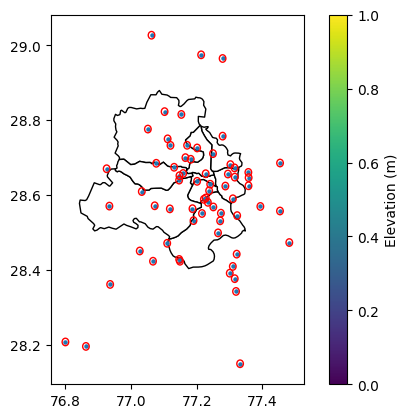

In [13]:
delhi = gpd.read_file("/home/patel_zeel/aqmsp/aqmsp_data/datasets/shapefiles/delhi/Districts.shp")
delhi = delhi.to_crs("EPSG:4326")

def distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    d_lat = np.radians(lat2 - lat1)
    d_lon = np.radians(lon2 - lon1)
    r_lat1 = np.radians(lat1)
    r_lat2 = np.radians(lat2)
    a = np.sin(d_lat / 2.) ** 2 + np.cos(r_lat1) * np.cos(r_lat2) * np.sin(d_lon / 2.) ** 2
    haversine = 2 * R * np.arcsin(np.sqrt(a))
    return haversine


fig, ax = plt.subplots()
delhi.plot(color='white', edgecolor='black', ax=ax)
ax.scatter(station_df.lon, station_df.lat, s=5)

# draw a circle of 10 km radius around each station
for i, row in station_df.iterrows():
    ax.add_patch(plt.Circle((row.lon, row.lat), 0.01, color='r', fill=False))

fig.colorbar(ax.collections[0], ax=ax, orientation="vertical", label="Elevation (m)")

In [14]:
delhi_pop_ds = pop_ds.sel(lat=slice(30.0, 28.0), lon=slice(76.0, 78.0))
delhi_pop_ds

<xarray.Dataset>
Dimensions:     (lat: 240, lon: 240)
Coordinates:
  * lat         (lat) float64 30.0 29.99 29.98 29.97 ... 28.03 28.02 28.01 28.0
  * lon         (lon) float64 76.0 76.01 76.02 76.03 ... 77.97 77.98 77.99 78.0
Data variables:
    population  (lat, lon) float64 66.0 65.0 97.0 459.0 ... 580.0 322.0 261.0

In [16]:
def get_population(station, radius):
    lat = station_df.loc[station, 'lat']
    lon = station_df.loc[station, 'lon']
    return delhi_pop_ds['population'].where(distance(delhi_pop_ds['lat'], delhi_pop_ds['lon'], lat, lon) < radius).sum().item()

# station_df["pop_0.008"] = [get_population(s, 0.008) for s in station_df.index]
station_df["pop_1km"] = [get_population(s, 1) for s in station_df.index]
station_df["pop_2km"] = [get_population(s, 2) for s in station_df.index]
station_df["pop_3km"] = [get_population(s, 3) for s in station_df.index]
station_df.head(10)

,lat,lon,elevation,pop_1km,pop_2km,pop_3km
station,,,,,,
"Alipur, Delhi - DPCC",28.815329,77.153010,232.723892,5191.0,24590.0,56670.0
"Arya Nagar, Bahadurgarh - HSPCB",28.670100,76.925400,235.903046,3634.0,47417.0,109756.0
"Anand Vihar, Delhi - DPCC",28.647622,77.315809,228.054230,112532.0,345187.0,928630.0
"Ashok Vihar, Delhi - DPCC",28.695381,77.181665,239.118973,102389.0,484199.0,982964.0
"Aya Nagar, Delhi - IMD",28.470691,77.109936,296.356903,11294.0,70928.0,174717.0
"Bawana, Delhi - DPCC",28.776200,77.051074,240.573120,9434.0,44755.0,108132.0
"Burari Crossing, Delhi - IMD",28.725650,77.201157,225.292328,9881.0,122118.0,314713.0
"CRRI Mathura Road, Delhi - IMD",28.551201,77.273574,237.021194,96539.0,427379.0,838143.0
"Chandni Chowk, Delhi - IITM",28.656756,77.227234,242.798279,99175.0,555126.0,969081.0


In [17]:
station_df.to_xarray().to_netcdf('/home/patel_zeel/aqmsp/aqmsp_data/datasets/cpcb/stations.nc')